<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ConvOutput" data-toc-modified-id="ConvOutput-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ConvOutput</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CIFAR10</a></span></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np 
import sys
sys.path.append('../code')

from dataload import cifar10_load, mnist_load
from saliency.attribution_methods import ConvOutput
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist',attention='RAN')

Data Complete
filename:  mnist_RAN


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10',attention='RAN')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
filename:  cifar10_RAN


# ConvOutput

In [4]:
CO_mnist = ConvOutput(mnist_model, seq_name='stages')
CO_cifar10 = ConvOutput(cifar10_model, seq_name='stages')

# MNIST

In [11]:
# CO
outputs, probs, preds = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=0)
outputs1, _, _ = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=1)
outputs2, _, _ = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=2)
outputs3, _, _ = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=3)
outputs4, _, _ = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=4)
outputs5, _, _ = CO_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=5)

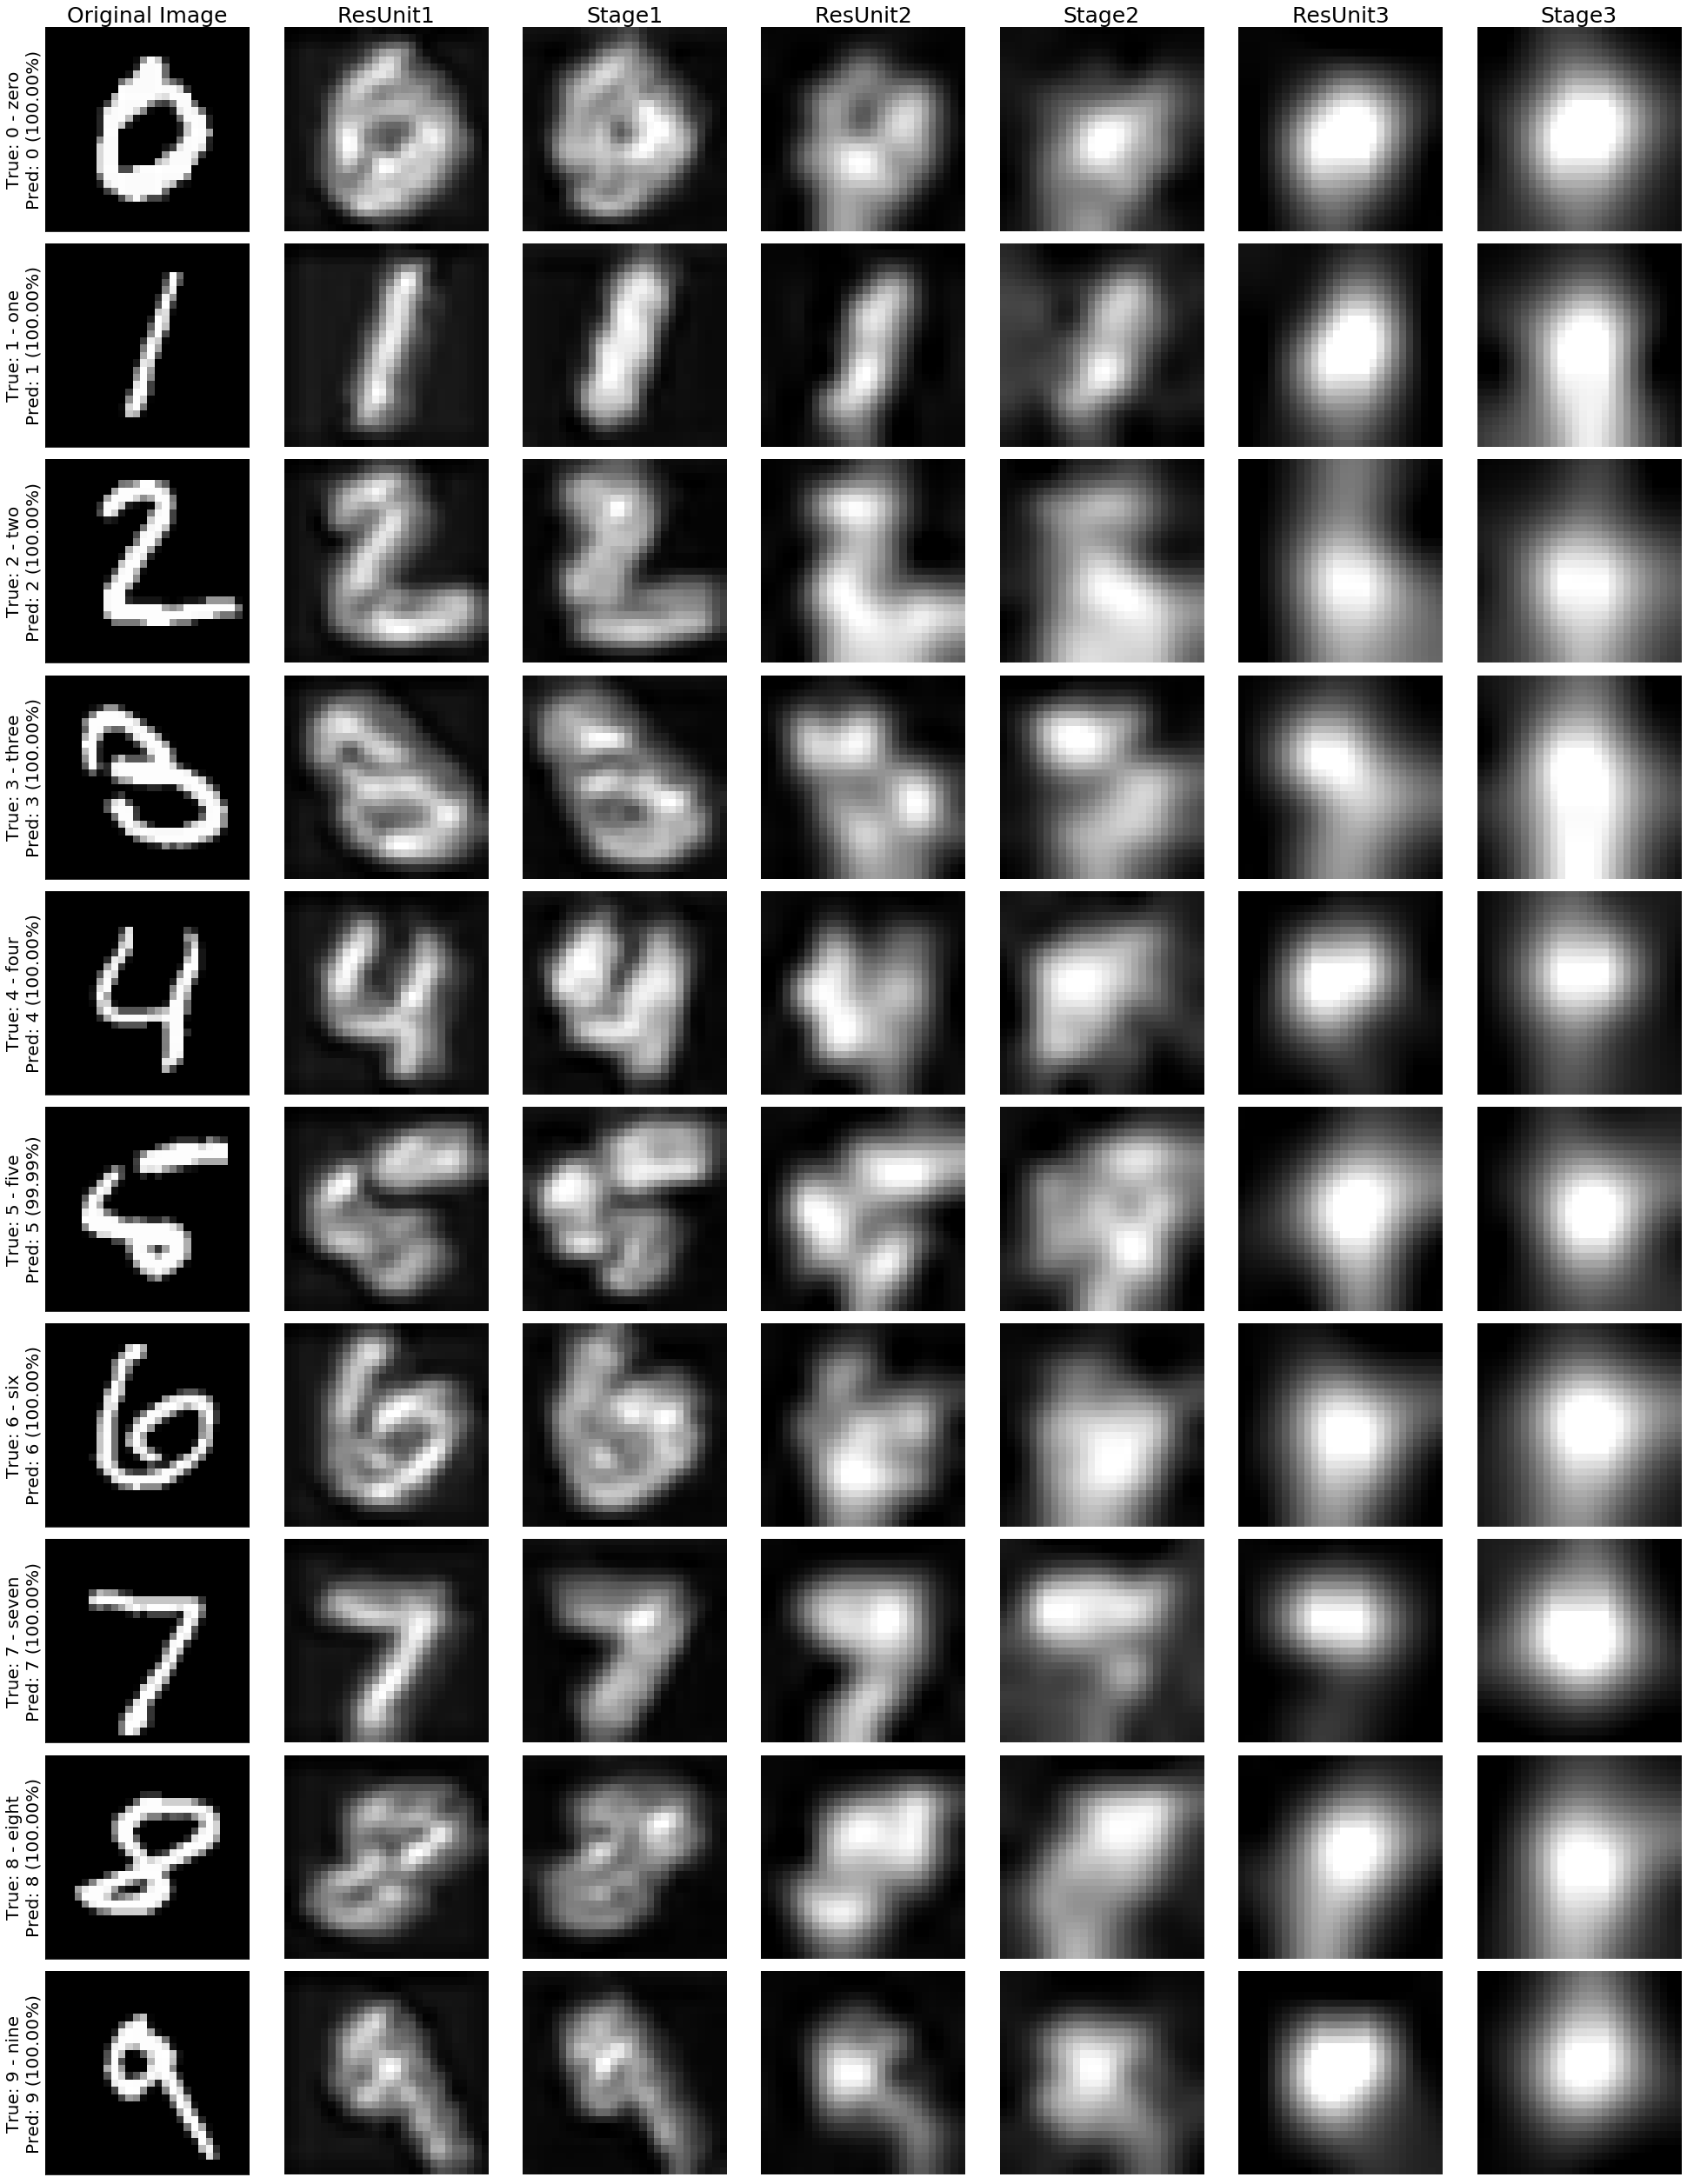

In [12]:
names = ['ResUnit1','Stage1','ResUnit2','Stage2','ResUnit3','Stage3'] # names
results = [outputs, outputs1, outputs2, outputs3, outputs4, outputs5]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    savedir='../images/results/RAN_CO(mnist).jpg', dpi=150,
                    col=7, row=10, size=(30,35), labelsize=20, fontsize=25)

# CIFAR10

In [13]:
# CO
outputs, probs, preds = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=0, color=True)
outputs1, _, _ = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=1, color=True)
outputs2, _, _ = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=2, color=True)
outputs3, _, _ = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=3, color=True)
outputs4, _, _ = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=4, color=True)
outputs5, _, _ = CO_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=5, color=True)

outputs = (outputs * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs1 = (outputs1 * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs2 = (outputs2 * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs3 = (outputs3 * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs4 = (outputs4 * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs5 = (outputs5 * 0.5 + original_images_cifar10 * 0.5).astype(int)

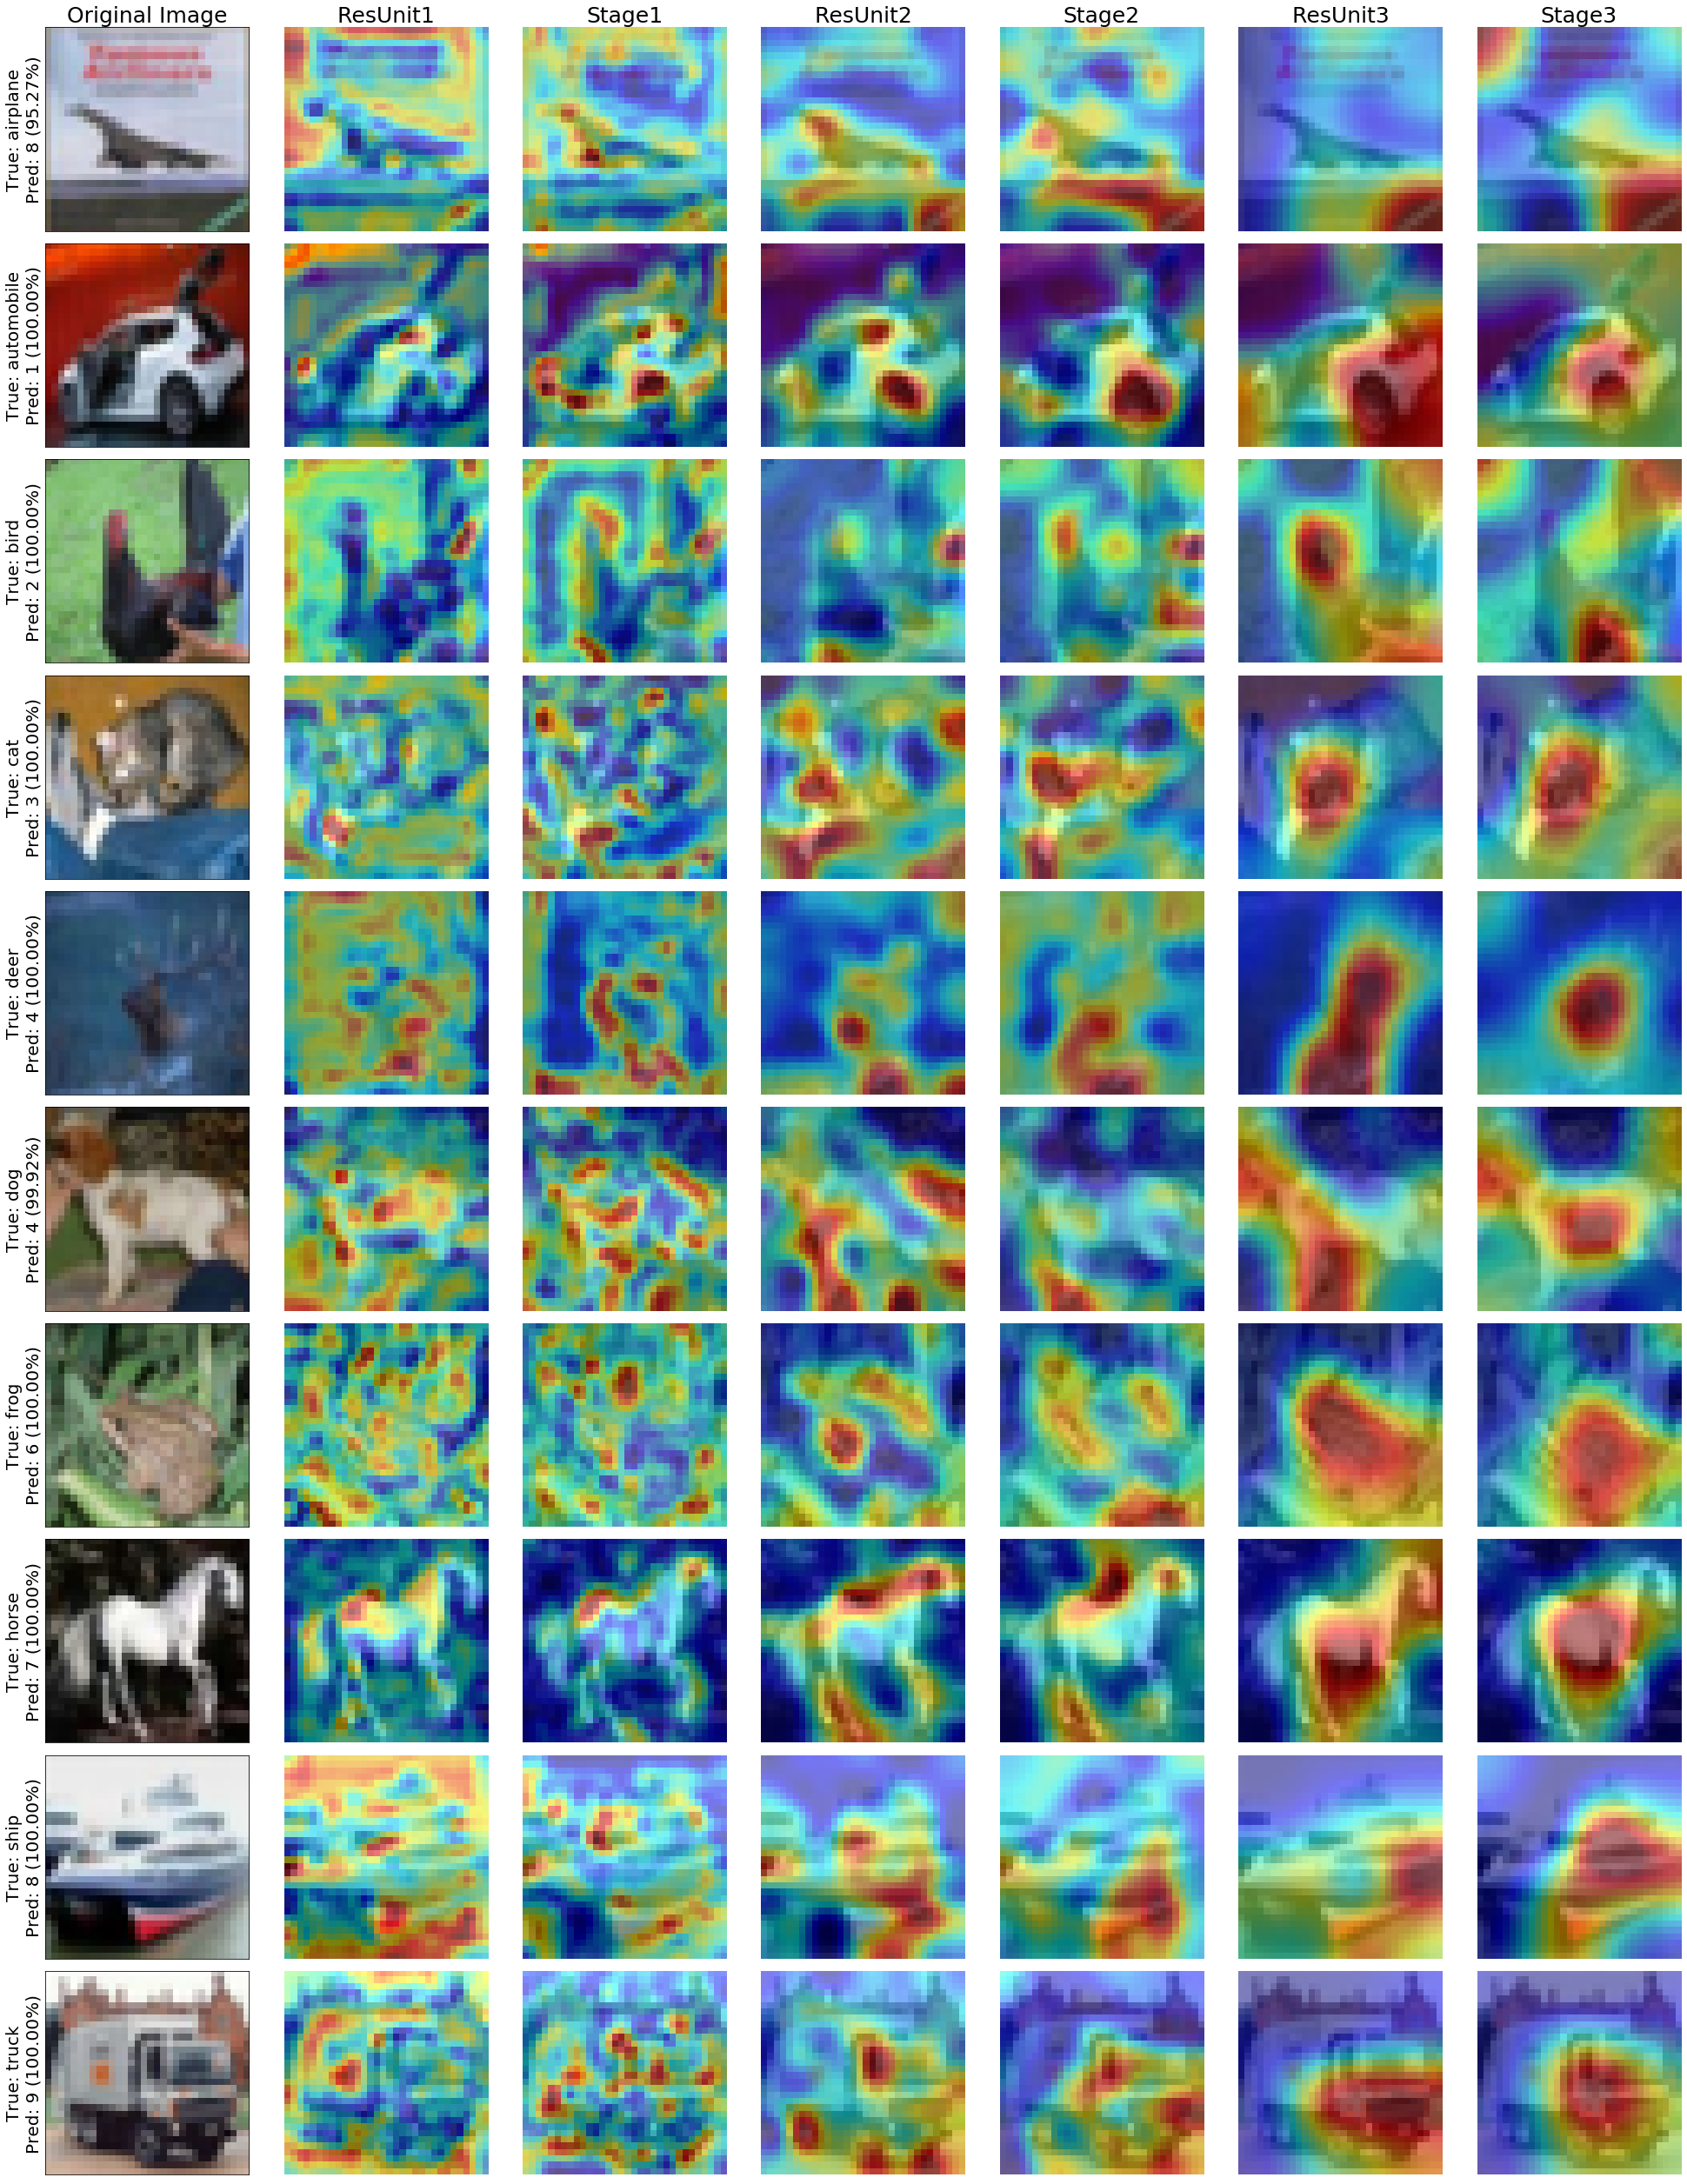

In [14]:
names = ['ResUnit1','Stage1','ResUnit2','Stage2','ResUnit3','Stage3'] # names
results = [outputs, outputs1, outputs2, outputs3, outputs4, outputs5]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    savedir='../images/results/RAN_CO(cifar10).jpg', dpi=150,
                    col=7, row=10, size=(30,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [5]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [6]:
CO_mnist.save(trainloader, '../saliency_maps/[mnist]CO_RAN_train.hdf5', layer=5)
CO_mnist.save(validloader, '../saliency_maps/[mnist]CO_RAN_valid.hdf5', layer=5)
CO_mnist.save(testloader, '../saliency_maps/[mnist]CO_RAN_test.hdf5', layer=5)

ConvOutput:   0%|          | 0/94 [00:00<?, ?it/s]

Save saliency maps


ConvOutput:   0%|          | 0/79 [00:00<?, ?it/s]

Save saliency maps


ConvOutput: 100%|██████████| 79/79 [00:33<00:00,  2.38it/s]


Save saliency maps


## CIFAR10

In [7]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [8]:
CO_cifar10.save(trainloader, '../saliency_maps/[cifar10]CO_RAN_train.hdf5', color=True, layer=5)
CO_cifar10.save(validloader, '../saliency_maps/[cifar10]CO_RAN_valid.hdf5', color=True, layer=5)
CO_cifar10.save(testloader, '../saliency_maps/[cifar10]CO_RAN_test.hdf5', color=True, layer=5)

ConvOutput:   0%|          | 0/79 [00:00<?, ?it/s]

Save saliency maps


ConvOutput:   0%|          | 0/79 [00:00<?, ?it/s]

Save saliency maps


ConvOutput: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]


Save saliency maps
